In [33]:
# Installing dependencies
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# Importa los modulos
import numpy as np
import pandas as pd
import matplotlib .pyplot
import seaborn as sns

In [35]:
# Installing the kaggle library
! pip install kaggle
#Making a directory 
! mkdir ~/.kaggle
# copy the "kaggle.json" 
!cp kaggle.json ~/.kaggle/
# allocating the required permision for this file
! chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [36]:
#download the dataset
! kaggle datasets download uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [38]:
df = pd.read_csv('/content/data.csv')

In [39]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
# Checking the total rows and columns
df.shape

(569, 33)

In [41]:
# Columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [42]:
#2nd way to check null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [43]:
# Drop the column with all missing values
df = df.dropna(axis=1)

In [44]:
df.shape

(569, 32)

In [45]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [46]:
# Count values of the column diagnosis 
df['diagnosis'].value_counts()  

B    357
M    212
Name: diagnosis, dtype: int64

<ipython-input-47-495ef002befb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = pd.Categorical(df['diagnosis'])


<Axes: xlabel='diagnosis', ylabel='count'>

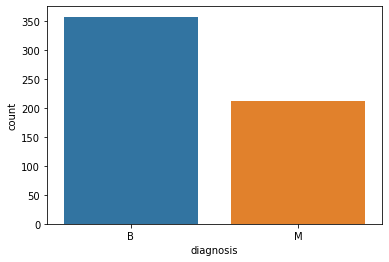

In [47]:
# Convert diagnosis to a categorical type
df['diagnosis'] = pd.Categorical(df['diagnosis'])

# Create a count plot of diagnosis cases
sns.countplot(data=df, x='diagnosis')

In [48]:
# Used for transforming values to 0 and 1 (Y values only)
from sklearn.preprocessing import LabelEncoder
LabelEncoder_Y = LabelEncoder()

In [49]:
# Categorical to Numerical
df.iloc[:,1] = LabelEncoder_Y.fit_transform(df.iloc[:,1].values)

In [50]:
# Displaying column 1 ("diagnosis") values (now 0 and 1)
df.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

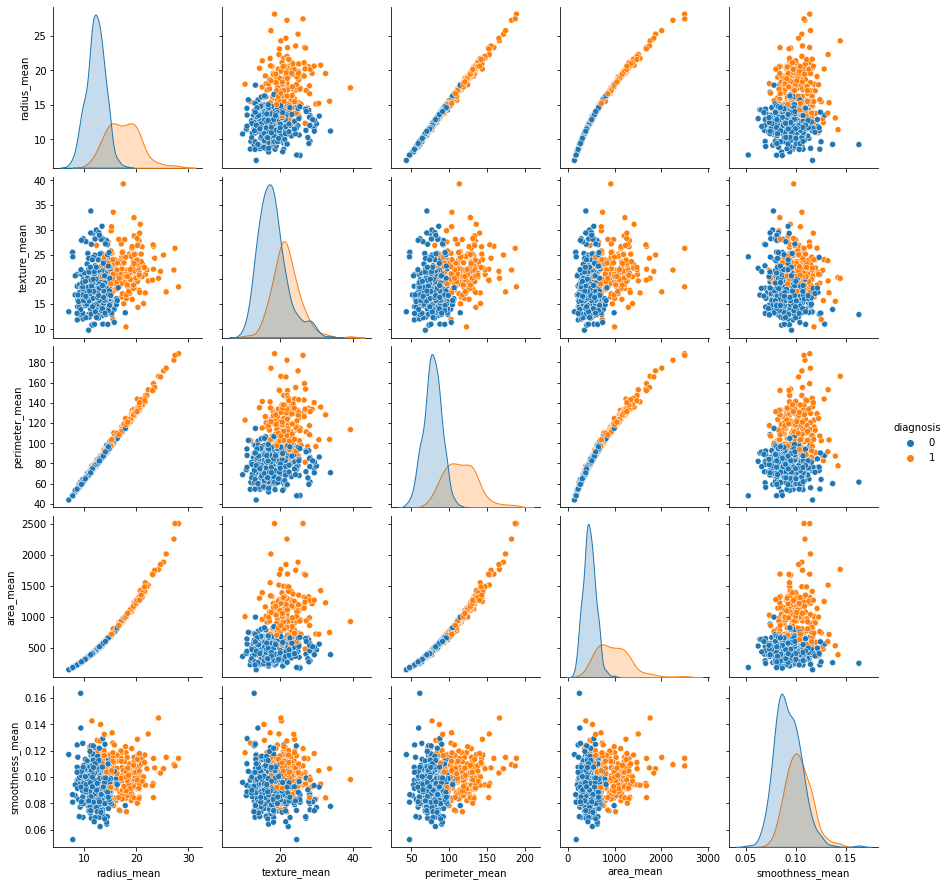

In [51]:
# Creation of pairplot (correlation of several variables)
sns.pairplot(df.iloc[:,1:7], hue='diagnosis')

<Axes: >

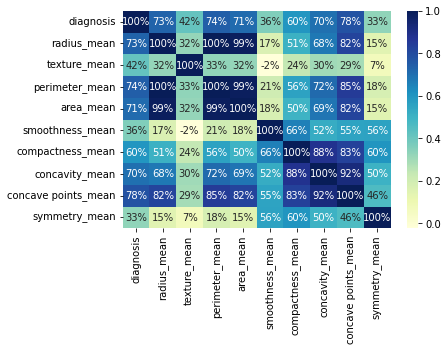

In [52]:
# Generation of a Heatmap of the correlation between several variables with the color scheme 'YlGnBu', data annotated and expression in percentage.
sns.heatmap(df.iloc[:,1:11].corr(), cmap= 'YlGnBu', annot=True, fmt= '.0%')

In [53]:
# Feature Scalling 
# Splitting the data Sets in dependent / independent
# Independiente = x
X = df.iloc[:,2:31].values
# Dependiente = y
Y = df.iloc[:,1].values

In [54]:
# Spliting the set 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_train.shape)

(455, 29)
(455,)
(114, 29)
(455,)


In [56]:
# Preprocesamiento / Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
# Evaluate more models using lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
LP_models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
LP_models

100%|██████████| 29/29 [00:08<00:00,  3.58it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.98,0.98,0.98,0.98,0.05
BaggingClassifier,0.98,0.98,0.98,0.98,0.41
RandomForestClassifier,0.97,0.97,0.97,0.97,0.65
AdaBoostClassifier,0.96,0.96,0.96,0.96,0.38
PassiveAggressiveClassifier,0.96,0.96,0.96,0.96,0.05
LogisticRegression,0.96,0.96,0.96,0.96,0.08
KNeighborsClassifier,0.96,0.96,0.96,0.96,0.02
ExtraTreeClassifier,0.96,0.95,0.95,0.96,0.01
XGBClassifier,0.96,0.95,0.95,0.96,5.07


In [58]:
print(LP_models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.98               0.98     0.98      0.98   
BaggingClassifier                  0.98               0.98     0.98      0.98   
RandomForestClassifier             0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.96               0.96     0.96      0.96   
PassiveAggressiveClassifier        0.96               0.96     0.96      0.96   
LogisticRegression                 0.96               0.96     0.96      0.96   
KNeighborsClassifier               0.96               0.96     0.96      0.96   
ExtraTreeClassifier                0.96               0.95     0.95      0.96   
XGBClassifier                      0.96               0.95     0.95      0.96   
LinearSVC                          0.96               0.95     0.95      0.96   
ExtraTreesClassifier        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'BaggingClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'AdaBoostClassifier'),
  Text(4, 0, 'PassiveAggressiveClassifier'),
  Text(5, 0, 'LogisticRegression'),
  Text(6, 0, 'KNeighborsClassifier'),
  Text(7, 0, 'ExtraTreeClassifier'),
  Text(8, 0, 'XGBClassifier'),
  Text(9, 0, 'LinearSVC'),
  Text(10, 0, 'ExtraTreesClassifier'),
  Text(11, 0, 'NuSVC'),
  Text(12, 0, 'CalibratedClassifierCV'),
  Text(13, 0, 'Perceptron'),
  Text(14, 0, 'DecisionTreeClassifier'),
  Text(15, 0, 'QuadraticDiscriminantAnalysis'),
  Text(16, 0, 'LGBMClassifier'),
  Text(17, 0, 'NearestCentroid'),
  Text(18, 0, 'SGDClassifier'),
  Text(19, 0, 'RidgeClassifier'),
  Text(20, 0, 'RidgeClassifierCV'),
  Text(21, 0, 'GaussianNB'),
  Text(22, 0, 'LinearDiscriminantAnalysis'),
  Text(23, 0, 'BernoulliNB'),
  Text(24, 0, 'LabelSpreading'),


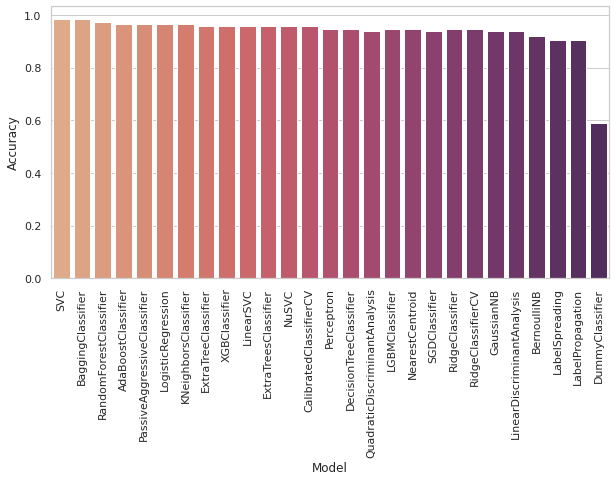

In [59]:
#For the creation of the graph to evaluate the models x = model name from models´ variable names
# https://seaborn.pydata.org/tutorial/color_palettes.html para cambiar el color
# https://github.com/dataprofessor/python/blob/main/lazypredict.ipynb

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=LP_models.index, y="Accuracy", data=LP_models, palette='flare')
plt.xticks(rotation=90)

In [60]:
# Creation of the three types of model
from sklearn import tree

# Assumes binary yes/no classification response
def models(X_train, Y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state= 0)
  log.fit(X_train, Y_train) 

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
  tree.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 0)
  forest.fit(X_train, Y_train)

  print('The accuracy of the Logistic Regression: ', log.score(X_train, Y_train))
  print('The accuracy of the Decision Regression: ', tree.score(X_train, Y_train))
  print('The accuracy of the Random Regression: ', forest.score(X_train, Y_train))

  return log, tree, forest


In [61]:
# Function deployment 
model = models(X_train, Y_train)

The accuracy of the Logistic Regression:  0.9912087912087912
The accuracy of the Decision Regression:  1.0
The accuracy of the Random Regression:  0.9978021978021978


In [62]:
# Creation of the confusion matrix, to see how accurate it is at the time of the predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model[0].predict(X_test))
tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
print(cm)
print('Accuracy: ', (tp+tn)/(tp+tn+fp+fn))

[[66  1]
 [ 3 44]]
Accuracy:  0.9649122807017544


In [63]:
# Another way of obtaining classification accuracy and score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model: ',i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model:  0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Model:  1
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

0.9385964912280702

Model:  2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weig

In [64]:
# Las predicciones del modelo vs las reales
pred = model[2].predict(X_test)
print('Our model prediction: ')
print(pred)
print()
print('Actual prediction: ')
print(Y_test)

Our model prediction: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

Actual prediction: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [65]:
for i in range(len(X_test)):
  if pred[i] == Y_test[i]:
    print("Correct")
  else:
    print("False")

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
False
Correct
False
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
False
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
